# Modeling and Validation Kaggle

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV

In [29]:
train = pd.read_csv('./datasets/train_mod05.csv')
test = pd.read_csv('./datasets/test_mod03.csv')

print(train.shape)
print(test.shape)


(1930, 1058)
(878, 1058)


In [30]:
# include all features other than target var and features that could not possible create a better model (PID, Id)
features = train.drop(columns=['SalePrice', 'PID', 'Id']).columns

X = train[features]
# log transform the target var to normalize the distribution of values
y = np.log(train['SalePrice'])


In [31]:
# Standardize X in order to run regularized regression
ss = StandardScaler()
ss.fit(X)
Z = ss.transform(X)


In [32]:
# Run ridge regression with optimized alpha hyperparameter
ridge_alphas = np.linspace(200, 800, 100)
# set model to optimize root mean squared error
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'neg_root_mean_squared_error', cv = 5)
model = ridge_cv.fit(Z, y)
# print alpha parameter to ensure it is not on the boundry of ridge_alphas
print(ridge_cv.alpha_)


563.6363636363636


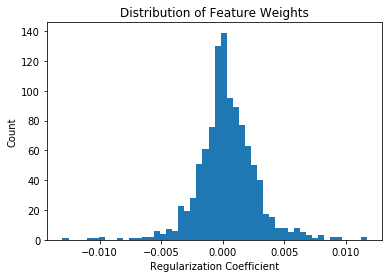

In [33]:
# visualize distribution or coefficients, post regularization
plt.hist(ridge_cv.coef_, bins=50)
plt.ylabel('Count')
plt.xlabel('Regularization Coefficient')
plt.title('Distribution of Feature Weights');


In [34]:
# model evaluation
print(cross_val_score(model, Z, y, cv=5).mean())
print(cross_val_score(model, Z, y, cv=5).std())

0.9172200371951545
0.012706525976493088


In [35]:
# select corresponding features from test set, standardize values accoring to the fit on the train set
Z_test = ss.transform(test[features])
# predict sales prices, convert values to original scale from log scale
test['SalePrice'] = np.exp(model.predict(Z_test))
# eyeball predictions
test['SalePrice']

0      147685.413289
1      157253.396984
2      217337.353079
3      100089.546202
4      172686.922585
           ...      
873    187366.221970
874    219049.335917
875    126001.656625
876    117441.985082
877    128620.237424
Name: SalePrice, Length: 878, dtype: float64

In [36]:
# save submission csv
test[['Id', 'SalePrice']].to_csv(f'./output/sub48', index=False)
